# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

In [2]:
DATA_PATH = "../data/leads_data.xlsx"

In [3]:
df = pd.read_excel(DATA_PATH, sheet_name="Data")
METADATA = pd.read_excel(DATA_PATH, sheet_name="Meta data")

In [4]:
# pd.options.display.max_colwidth = 500
# pd.options.display.max_rows = 500

# Basic statistics 

In [5]:
len(df)

30773

In [6]:
df.columns

Index(['LeadId', 'VisitorId', 'BornDate', 'BornDateTime', 'Project', 'Stage',
       'CountOfClickEvents', 'WebTimeSpent (seconds)', 'UTM-Source',
       'InstanceNumber', 'HOME_TimeSpent', 'LOCATION_TimeSpent',
       'MEDIA_TimeSpent', 'PLAN_TimeSpent', 'PRICE_TimeSpent',
       'SPECIFICATIONS_TimeSpent', 'AMENITIES_TimeSpent', 'MediaTime',
       'OperatingSystem', 'Country', 'State', 'City', 'MicroMarket'],
      dtype='object')

In [7]:
# Drop rows null value
df.dropna(how="any")
len(df)

30773

In [8]:
df.describe()

,LeadId,BornDate,BornDateTime,CountOfClickEvents,WebTimeSpent (seconds),InstanceNumber,HOME_TimeSpent,LOCATION_TimeSpent,MEDIA_TimeSpent,PLAN_TimeSpent,PRICE_TimeSpent,SPECIFICATIONS_TimeSpent,AMENITIES_TimeSpent,MediaTime
count,30773.000000,30773,30773,30773.000000,30773.000000,30773.000000,30773.000000,30773.000000,30773.000000,30773.000000,30773.000000,30773.000000,30773.000000,30773.000000
mean,219154.832646,2024-07-19 10:27:25.052480768,2024-07-20 00:27:25.194553600,12.989894,285.181576,1.944042,81.915350,15.603296,3.302705,48.636965,128.674139,5.085368,1.963754,6.484647
min,186827.000000,2024-04-15 00:00:00,2024-04-15 00:54:45,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-217.500000
25%,199807.000000,2024-06-03 00:00:00,2024-06-03 21:22:08,6.000000,94.030000,1.000000,16.209000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,216114.000000,2024-07-27 00:00:00,2024-07-27 15:08:34,9.000000,159.877000,1.000000,42.973000,0.000000,0.000000,0.000000,88.821000,0.000000,0.000000,0.000000
75%,234720.000000,2024-09-02 00:00:00,2024-09-02 13:25:49,14.000000,282.257000,2.000000,84.673000,0.000000,0.000000,0.000000,164.129000,0.000000,0.000000,0.000000
max,271777.000000,2024-10-15 00:00:00,2024-10-15 13:18:47,1452.000000,183142.689000,745.000000,103350.413000,7525.106000,4530.068000,182771.713000,42189.682000,12003.949000,2830.945000,5474.330000
std,22639.899580,NaN,NaN,21.107236,1658.147149,5.811552,838.003378,105.910960,49.039869,1197.661903,544.696035,83.477692,33.737395,61.454323


In [9]:
print(df.isnull().sum())

LeadId                        0
VisitorId                     0
BornDate                      0
BornDateTime                  0
Project                       0
Stage                         0
CountOfClickEvents            0
WebTimeSpent (seconds)        0
UTM-Source                    0
InstanceNumber                0
HOME_TimeSpent                0
LOCATION_TimeSpent            0
MEDIA_TimeSpent               0
PLAN_TimeSpent                0
PRICE_TimeSpent               0
SPECIFICATIONS_TimeSpent      0
AMENITIES_TimeSpent           0
MediaTime                     0
OperatingSystem               0
Country                      58
State                       220
City                          9
MicroMarket                   0
dtype: int64


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df['Stage'].value_counts()

Stage
Not Interested     30595
Pre Site Visit        96
Post Site Visit       42
Sales Closure         38
Flat Blocked           2
Name: count, dtype: int64

## Histogram to show Time Spent in Website

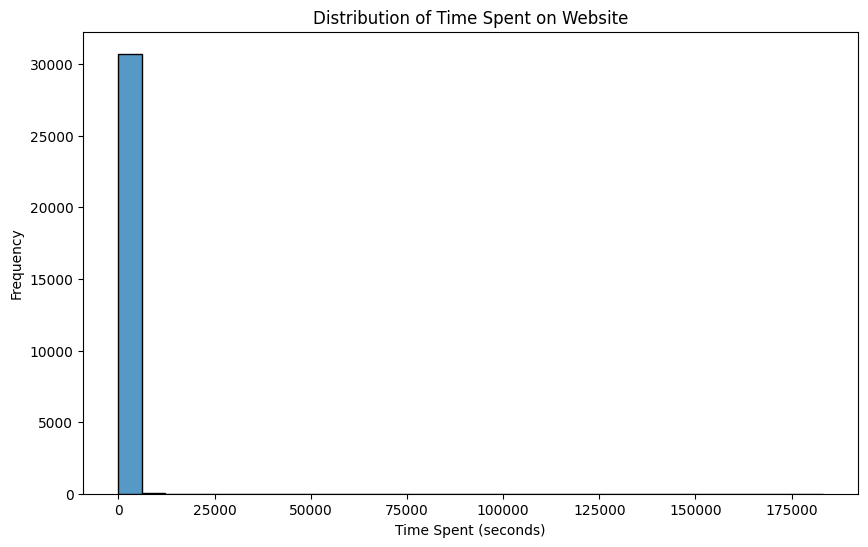

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['WebTimeSpent (seconds)'], kde=False, bins=30)
plt.title('Distribution of Time Spent on Website')
plt.xlabel('Time Spent (seconds)')
plt.ylabel('Frequency')
plt.show()

## Histogram for Distribution of Click Events

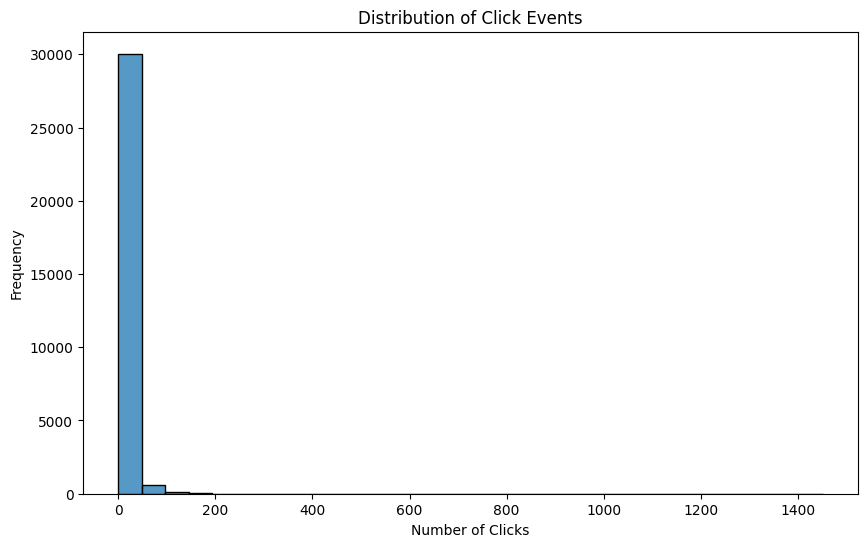

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CountOfClickEvents'], kde=False, bins=30)
plt.title('Distribution of Click Events')
plt.xlabel('Number of Clicks')
plt.ylabel('Frequency')
plt.show()

## Graph for Lead Stage Distribution 

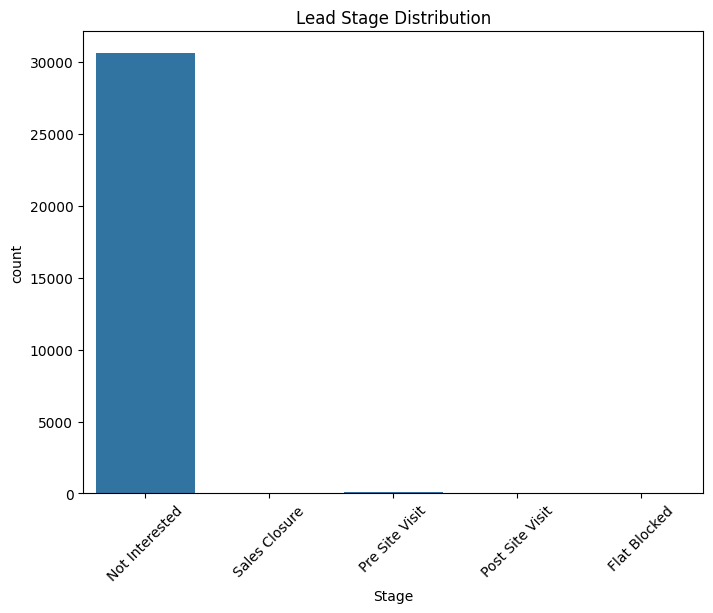

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Stage', data=df)
plt.title('Lead Stage Distribution')
plt.xticks(rotation=45)
plt.show()

## Lead Distribution by Country

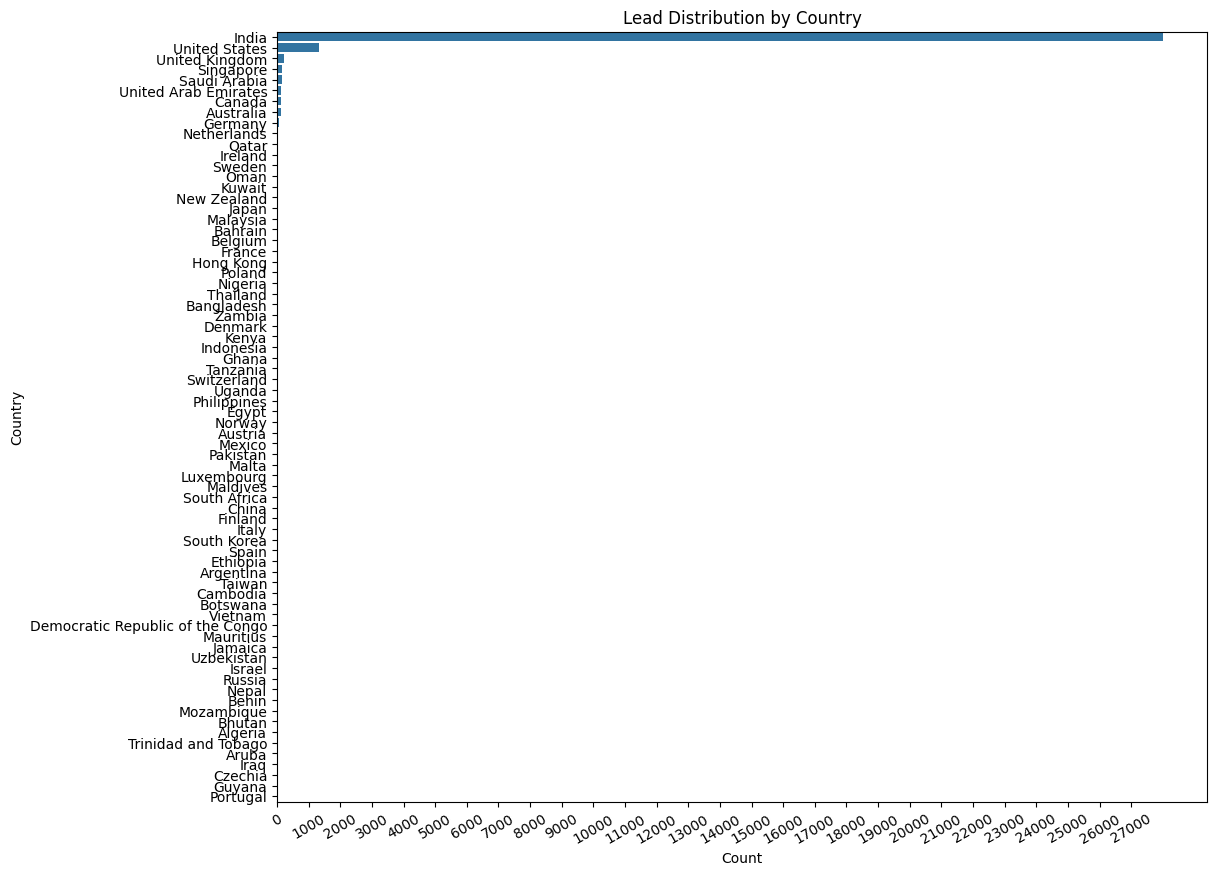

In [15]:
plt.figure(figsize=(12, 10))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Lead Distribution by Country')
plt.xlabel('Count')
plt.ylabel('Country')
max_count = df['Country'].value_counts().max()
plt.xticks(ticks=range(0, max_count + 1, 1000), rotation=30)  
plt.show()

## Outlier Detection (Boxplot)

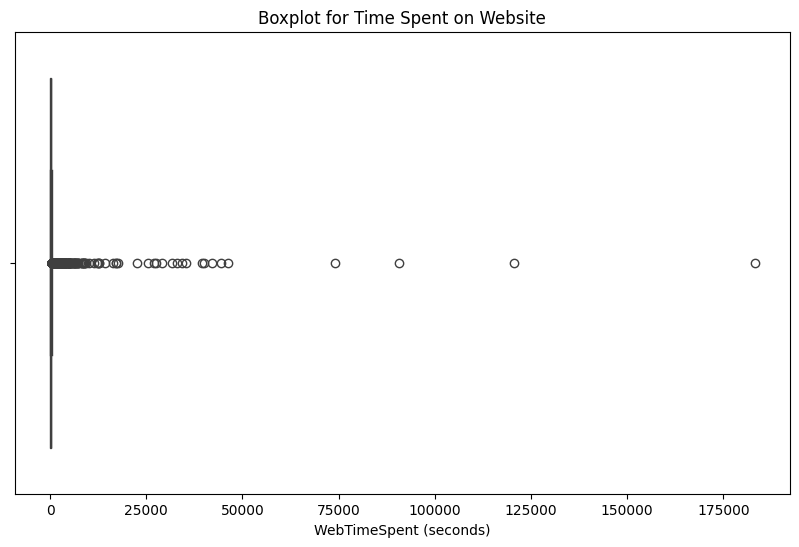

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['WebTimeSpent (seconds)'])
plt.title('Boxplot for Time Spent on Website')
plt.show()

## Plots explanation
From the above plots, it is evident that most visitors spend between 0 to 200 seconds on our website. <br />
The top countries our visitors are from include India, the USA, the United Kingdom, Singapore, Saudi Arabia, the UAE, Canada, Australia, Germany, and the Netherlands.<br />
The lead stage distribution plot shows that visitors are either not interested or have previously visited the site. <br />
Similar to time spent on the website, the number of clicks within the website ranges between 0 and 200.

# Lead Scoring Logic Development
Lead Score Calculation is one of the most crucial part in this assignment. <br />
So I have used features like WebTimeSpent (seconds) and CountOfClickEvents as these features will give me the best score analysis. <br />
The stages also plays a crucial role in this lead score as I can get what the customer want. <br />
Then I applyed this function to df(pandas data frame), which will give me a column named leadScore. 

In [17]:
def calculate_lead_score(row):
    score = 0
    # Base score for engagement
    score += row['WebTimeSpent (seconds)'] / 60  # 1 point for every minute spent on the website
    score += row['CountOfClickEvents'] * 0.5  # 0.5 points per click

    # Stage-based scoring
    stage_scores = {'New Lead': 10, 'Lead Initiated': 20, 'Pre Site Visit': 30,
                    'Post Site Visit': 50, 'Sales Closure': 200, 'Not Interested': -100}
    score += stage_scores.get(row['Stage'], 0)

    # Bonus score for frequent visits
    score += row['InstanceNumber'] * 2  # Additional points for frequent visits

    return score

# Apply the function to the dataframe
df['LeadScore'] = df.apply(calculate_lead_score, axis=1)

In [18]:
df.head(5)

,LeadId,VisitorId,BornDate,BornDateTime,Project,Stage,CountOfClickEvents,WebTimeSpent (seconds),UTM-Source,InstanceNumber,...,PRICE_TimeSpent,SPECIFICATIONS_TimeSpent,AMENITIES_TimeSpent,MediaTime,OperatingSystem,Country,State,City,MicroMarket,LeadScore
0,198611,Visitor-1003563,2024-05-30,2024-05-30 12:52:10,Springs,Not Interested,15,501.779,Google,6,...,137.307,0.0,0.0,0.00,Windows,India,Maharashtra,Mumbai,Andheri West,-72.137017
1,193927,Visitor-1006753,2024-05-10,2024-05-10 16:07:47,Spectra,Not Interested,5,54.175,GDN,2,...,0.000,0.0,0.0,0.00,Android,India,Telangana,Hyderabad,Habsiguda,-92.597083
2,230525,Visitor-1017271,2024-08-24,2024-08-24 19:42:04,Springs,Not Interested,18,292.363,GMB,17,...,58.243,0.0,0.0,0.00,Android,United Arab Emirates,دبي,دبي,زعبيل,-52.127283
3,208705,Visitor-1029567,2024-07-10,2024-07-10 12:36:38,Spectra,Not Interested,6,178.201,Google,6,...,173.130,0.0,0.0,0.00,Android,India,Chhattisgarh,Durg,Guru Nanak Nagar,-82.029983
4,253755,Visitor-1044910,2024-09-22,2024-09-22 14:30:57,Spectra,Not Interested,49,973.996,Google,4,...,536.560,0.0,0.0,10.05,Android,India,Telangana,Sangareddy,Vidya Nagar Colony,-51.266733


## Graph for Distribution of Lead Score 
It is evident from the graph below that most of our lead Score range from 0 to 500. <br />
On y axis we have frequeny of lead Score.

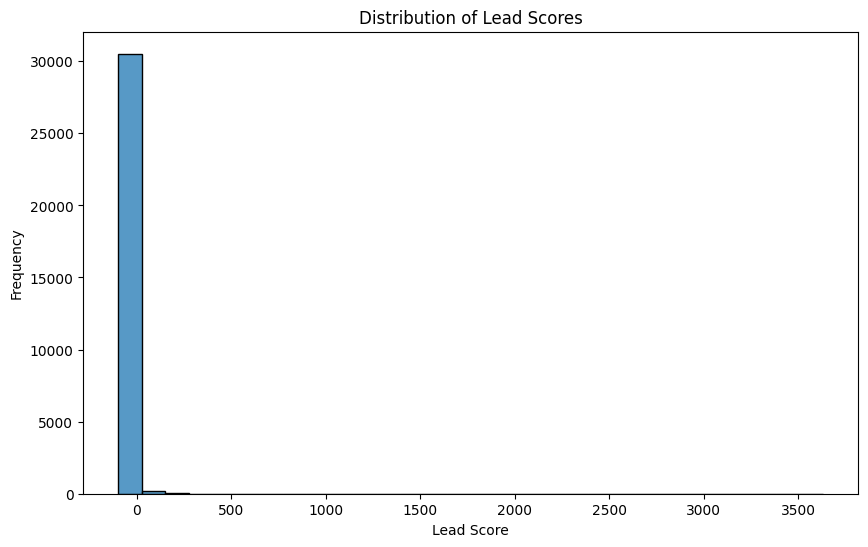

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['LeadScore'], kde=False, bins=30)
plt.title('Distribution of Lead Scores')
plt.xlabel('Lead Score')
plt.ylabel('Frequency')
plt.show()

## BoxPlot for leadScore and Different Stages
As we can see that the median for Sales Closure is highest we conclude that my function for lead score works.

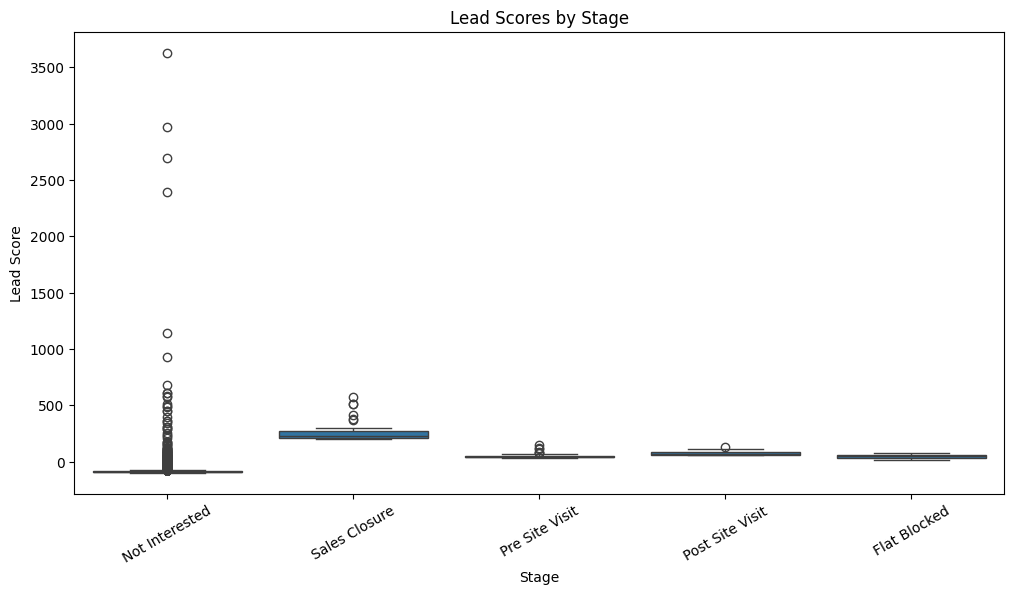

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Stage', y='LeadScore', data=df)
plt.title('Lead Scores by Stage')
plt.xlabel('Stage')
plt.ylabel('Lead Score')
plt.xticks(rotation=30)
plt.show()

# Scatter Plot of Web Time Spent and LeadScore
It is seen that as the Time spent increases lead Score also increases 

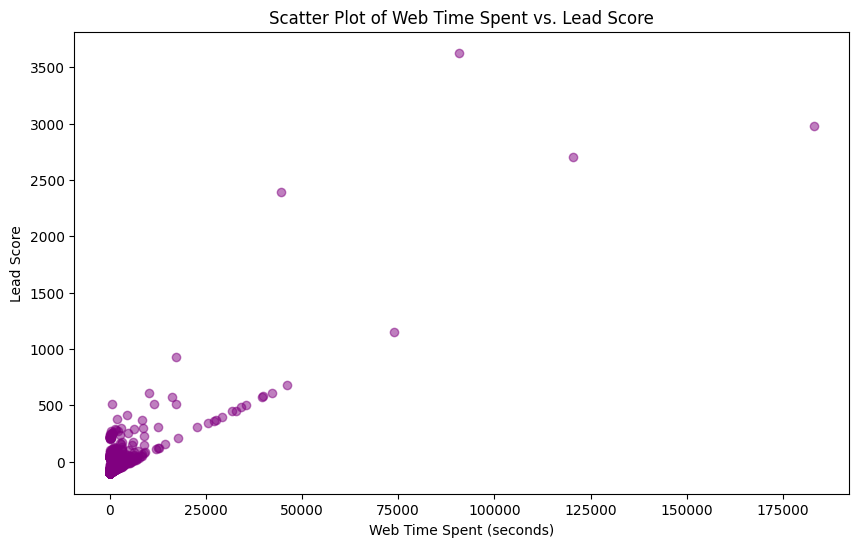

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df['WebTimeSpent (seconds)'], df['LeadScore'], alpha=0.5, c='purple')
plt.title('Scatter Plot of Web Time Spent vs. Lead Score')
plt.xlabel('Web Time Spent (seconds)')
plt.ylabel('Lead Score')
plt.show()

# Top Contributors/Features
Converting Stage features to 0 or 1 (1 if Sales Closure 0 otherwise)

In [22]:
df['Converted'] = df['Stage'].apply(lambda x: 1 if x == 'Sales Closure' else 0)

## Chi-Square Test 
**For Categorical values I have used Chi-Square Test for UTM-Source**

In [23]:
contingency_table = pd.crosstab(df['UTM-Source'], df['Converted'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square test for 'UTM-Source': chi2 = {chi2}, p-value = {p}")

Chi-square test for 'UTM-Source': chi2 = 21.412084987657206, p-value = 0.9222440470302972


**For Count of click Events**

In [24]:
contingency_table = pd.crosstab(df['CountOfClickEvents'], df['Converted'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square test for 'CountOfClickEvents': chi2 = {chi2}, p-value = {p}")

Chi-square test for 'CountOfClickEvents': chi2 = 3097.9890153524398, p-value = 0.0


**For WebTimeSpent**

In [25]:
contingency_table = pd.crosstab(df['WebTimeSpent (seconds)'], df['Converted'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square test for 'WebTimeSpent (seconds)': chi2 = {chi2}, p-value = {p}")

Chi-square test for 'WebTimeSpent (seconds)': chi2 = 30367.591487075413, p-value = 0.03172486226144882


In [26]:
df1 = df[['CountOfClickEvents', 'WebTimeSpent (seconds)', 'LeadScore', 'Converted']]

**Corelation**

In [27]:
correlations = df1.corr()['Converted'].sort_values(ascending=False)
print(correlations)

Converted                 1.000000
LeadScore                 0.284880
CountOfClickEvents        0.044646
WebTimeSpent (seconds)    0.035903
Name: Converted, dtype: float64


In [28]:
utm_source_counts = df['UTM-Source'].value_counts().to_dict()
print(utm_source_counts)

{'Google': 19755, 'Organic': 8536, 'Direct': 853, 'FIM': 408, 'Yoptima': 281, 'GMB': 204, 'ig': 170, 'Newsprint': 107, 'WhatsApp': 102, 'google': 75, 'Mygate': 74, 'Whatsapp': 45, 'Blog': 32, 'Inshorts': 31, 'fb': 27, 'LinkedIn': 14, 'Facebook': 12, 'Adonmo': 10, 'Eenadu': 8, 'Youtube': 5, 'tma': 5, 'ASBL': 3, 'Sakshi': 3, 'PD': 2, 'zoom': 2, 'GoogleAds': 2, 'GDN': 1, 'Google_Organic': 1, 'TOI': 1, 'IG': 1, 'whatsapp': 1, 'Others': 1, 'sakshi': 1}


In [29]:
conversion_summary = df.groupby('Converted')[['CountOfClickEvents', 'WebTimeSpent (seconds)', 'LeadScore']].agg(['mean', 'median'])
conversion_summary

CountOfClickEvents        WebTimeSpent (seconds)           \
                        mean median                   mean   median   
Converted                                                             
0                  12.956759    9.0             283.088333  159.802   
1                  39.789474   19.5            1978.229605  287.785   

            LeadScore              
                 mean      median  
Converted                          
0          -84.313942  -89.413267  
1          269.759967  231.896075

**It is seen that the best feature to predict lead score is Count Of Clicks because the p-value is lowest and corelation is the highest after lead Score**

## Comparison

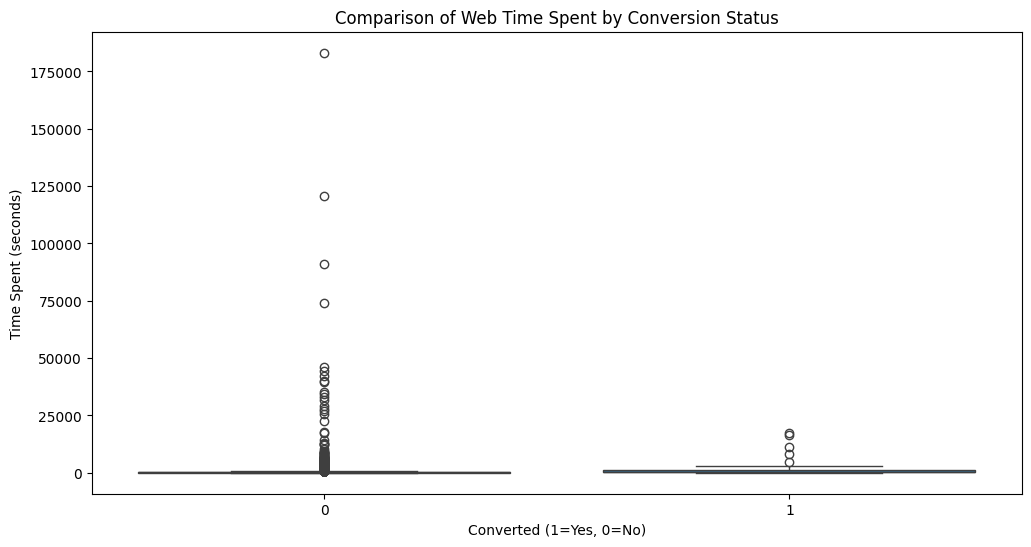

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Converted', y='WebTimeSpent (seconds)', data=df)
plt.title('Comparison of Web Time Spent by Conversion Status')
plt.xlabel('Converted (1=Yes, 0=No)')
plt.ylabel('Time Spent (seconds)')
plt.show()

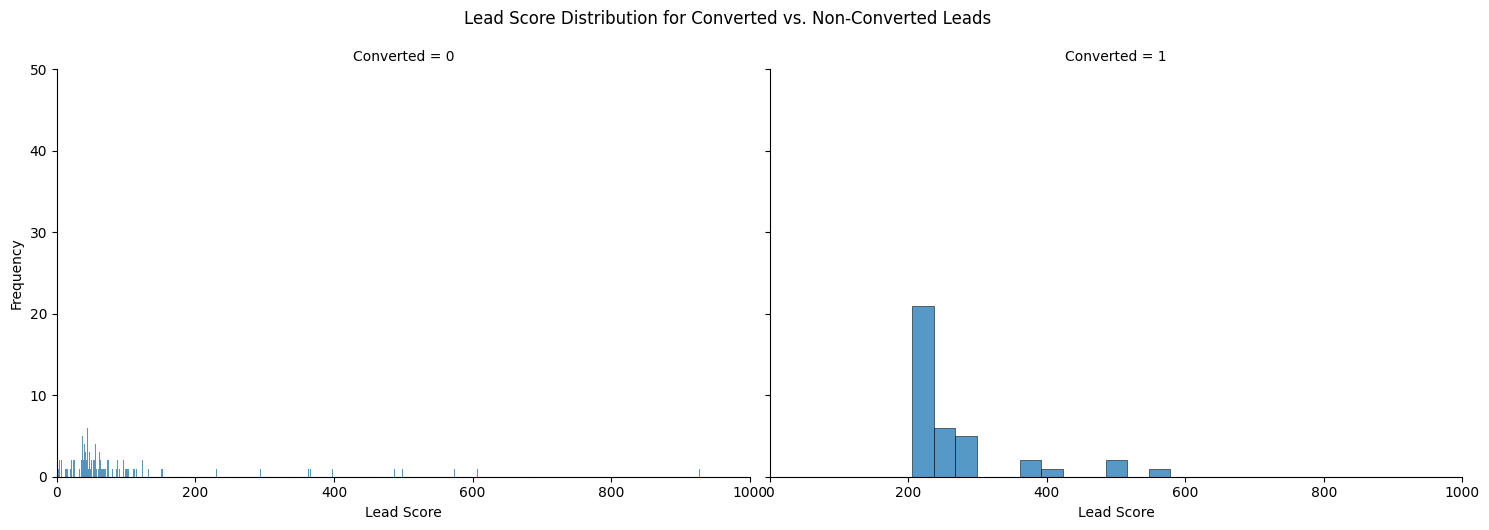

In [31]:
g = sns.FacetGrid(df, col="Converted", height=5, aspect=1.5)
g.map(sns.histplot, 'LeadScore', kde=False)
g.set_axis_labels("Lead Score", "Frequency")
g.set_titles("Converted = {col_name}")
g.set(xlim=(0, 1000), ylim=(0, 50)) 
plt.suptitle("Lead Score Distribution for Converted vs. Non-Converted Leads", y=1.05)
plt.show()

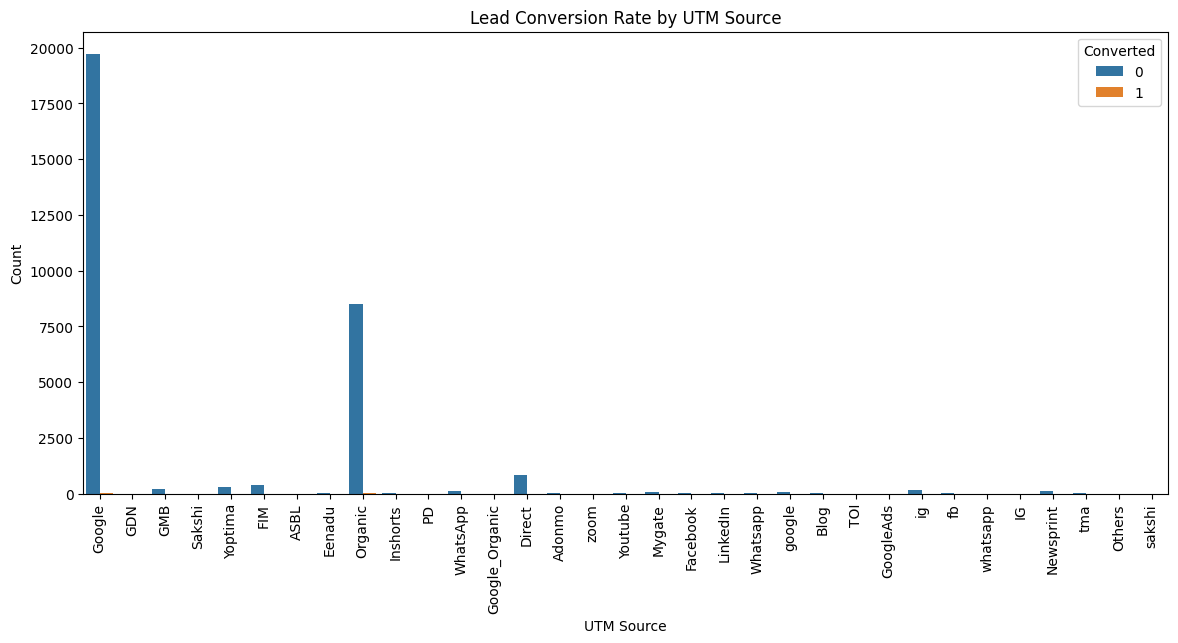

In [32]:
plt.figure(figsize=(14, 6))
sns.countplot(x='UTM-Source', hue='Converted', data=df)
plt.title('Lead Conversion Rate by UTM Source')
plt.xticks(rotation=90)
plt.xlabel('UTM Source')
plt.ylabel('Count')
plt.show()


**T-test for webTimeSpent** 

In [33]:
converted = df[df['Converted'] == 1]['WebTimeSpent (seconds)']
not_converted = df[df['Converted'] == 0]['WebTimeSpent (seconds)']
t_stat, p_val = ttest_ind(converted, not_converted)
print(f'T-test for WebTimeSpent: t-statistic = {t_stat}, p-value = {p_val}')

T-test for WebTimeSpent: t-statistic = 6.302013763015629, p-value = 2.977790548589143e-10


# Conclusion

**The lead scoring model developed in this analysis can serve as a practical tool to prioritize leads, allowing sales teams to allocate resources more effectively toward high-potential prospects. By using the lead score as an indicator, marketing and sales teams can focus their outreach on leads that demonstrate behaviors correlated with conversion. For further refinement, ongoing validation and model adjustments based on new data can enhance the model’s accuracy and adaptability.** <br/>
**In summary, these insights and the lead scoring model provide actionable steps to boost conversion rates, refine targeting efforts, and improve the efficiency of the lead nurturing process.**